### Importação das Bibliotecas

In [1]:
# Bibliotecas
import numpy as np # Biblioteca para operações de álgebra linear
from PIL import Image # Biblioteca para manipular as imgs (fazer a leitura, plotar, etc)
import pandas as pd # Biblioteca para manipulação de dados e álgebra linear
import matplotlib.pyplot as plt # Biblioteca para visualização de dados
from glob import glob # Módulo para encontrar arquivos dado um diretório
#import cv2  

%matplotlib notebook

### Criando datasets que contém o diretório de cada imagem

In [2]:
data_dir = './CrackForest-dataset-master/image' # Acessar o diretório com as imagens
image_files = glob(data_dir + '/*.jpg') # Criar um dataset com todos os diretórios das imgs

data_dir_asphalt_crack = './Asphalt Crack Dataset/448/Cracks' # Acessar o diretório com as imagens
asphalt_crack_files = glob(data_dir_asphalt_crack + '/*.jpg') # Criar um dataset com todos os diretórios das imgs

data_dir_asphalt_noncrack = './Asphalt Crack Dataset/448/NonCracks' # Acessar o diretório com as imagens
asphalt_noncrack_files = glob(data_dir_asphalt_noncrack + '/*.jpg') # Criar um dataset com todos os diretórios das imgs

### Criando funções para que, dado um dataset que tenha o diretório das imagens, duplique ou triplique o meu número de dados

In [3]:
# A função abaixo vai criar 2 datasets contendo os pixels de cada imagem contida no dataset dos Diretórios   
# O primeiro dataset contém as imgs originais, o segundo contém as imgs rotacionadas em 180°
# E no final vai nos retornar um dataset que junta os dois anteriores, dessa forma consigo
# duplicar meu número de dados

def df_create_2(df_name, df_name_rotate, image_data): # (dataframe1 vazio, dataframe1 rotacionado vazio, dataset do diretório)    
    for file in range(0, len(image_data),1): # com esse for vamos varrer cada linha do meu dataset com os dir
        img1 = Image.open(image_data[file],'r') # Estamos lendo as imgs do dataset que contém os dirs
        img1 = img1.convert('L') # Transformando a img para greyscale
        img1 = img1.resize((448, 448)) 
        img1_rotate = img1.rotate(180) # Rotacionando a img em 180°
        
        img1_n = np.asarray(img1.getdata(), dtype=np.float64) # Convertendo a img para pixels e salvando em um Numpy Array de 1 dimensão   
        img1_n_rotate = np.asarray(img1_rotate.getdata(), dtype=np.float64) # Fazendo a mesma coisa para a imagem rotacionada
        
        df_name[file] = img1_n # Adicionando os pixels de uma img no dataframe1 vazio
        df_name_rotate[file] = img1_n_rotate # Mesma coisa para as imgs rotacionadas
        
    df_name = df_name.T # Pegando a transposta da Matrix para que as linhas sejam as imagens e as colunas seus pixels
    df_name_rotate = df_name_rotate.T # Pegando a transposta da Matrix para que as linhas sejam as imagens e as colunas seus pixel
    df_concat = pd.concat([df_name,df_name_rotate]).reset_index().drop('index', axis=1) # Juntando as duas matrizes 
    return df_concat # Retornando o DataFrame(Matriz) Desejada

In [4]:
# A função abaixo faz a mesma coisa que a df_create_2, porém ela triplica o meu número de imagem
# Ou seja, ela criar três dataframes(matrizes), o primeiro sendo as imgs originais
# O segundo as imgs rotacionadas em 90° e o terceiro as imgs rotacionadas em 180°
def df_create_3(df_name, df_name_rotate90,df_name_rotate180, image_data):
    #df_name = pd.DataFrame()
    for file in range(0, len(image_data),1):
        img1 = Image.open(image_data[file],'r')
        img1 = img1.convert('L') # Makes it greyscale
        img1 = img1.resize((448, 448))
        img1_rotate90 = img1.rotate(90)
        img1_rotate180 = img1.rotate(180)
        
        img1_n = np.asarray(img1.getdata(), dtype=np.float64)
        img1_n_rotate90 = np.asarray(img1_rotate90.getdata(), dtype=np.float64)
        img1_n_rotate180 = np.asarray(img1_rotate180.getdata(), dtype=np.float64)

        df_name[file] = img1_n
        df_name_rotate90[file] = img1_n_rotate90
        df_name_rotate180[file] = img1_n_rotate180
        
    df_name = df_name.T
    df_name_rotate90 = df_name_rotate90.T
    df_name_rotate180 = df_name_rotate180.T
    df_concat = pd.concat([pd.concat([df_name,df_name_rotate90]),df_name_rotate180])
    df_concat = df_concat.reset_index().drop('index', axis=1)
    return df_concat

### Criando os datasets onde cada linha representa uma imagem e cada coluna representa os pixels dessa imagem

In [5]:
# DataFrame 1 com imagens de rachaduras, utilizando a função df_create_2
df_crack1 = pd.DataFrame()
df_crack1_rotate = pd.DataFrame()
df_crack1 = df_create_2(df_crack1, df_crack1_rotate, image_files)

# Dataframe 2 com imagens de rachadura, utilizando a função df_create_2
df_crack2 = pd.DataFrame()
df_crack2_rotate = pd.DataFrame()
df_crack2 = df_create_2(df_crack2, df_crack2_rotate, asphalt_crack_files)

# Dataframe 3 combinando os Dataframes 1 e 2, totalizando 710 imagens de rachaduras
df_crack = pd.concat([df_crack1, df_crack2]).reset_index().drop('index', axis=1)

# Dataframe com imagens sem rachaduras
# Aqui eu chamo a função df_create_3 e triplico o número de dados que tenho de imgs sem rachaduras 
df_non_crack = pd.DataFrame()
df_non_crack_rotate90 = pd.DataFrame()
df_non_crack_rotate180 = pd.DataFrame()
df_non_crack = df_create_3(df_non_crack, df_non_crack_rotate90, df_non_crack_rotate180, asphalt_noncrack_files)

### Visualização dos DataFrames

* Dataframe com as imagens de rachaduras
* Total de 710 imagens

In [20]:
df_crack2

,0,1,2,3,4,5,6,7,8,9,...,200694,200695,200696,200697,200698,200699,200700,200701,200702,200703
0,131.0,94.0,60.0,99.0,103.0,70.0,67.0,80.0,85.0,86.0,...,94.0,89.0,101.0,98.0,108.0,116.0,115.0,205.0,181.0,148.0
1,134.0,112.0,130.0,125.0,92.0,82.0,81.0,80.0,91.0,84.0,...,136.0,146.0,152.0,160.0,150.0,156.0,164.0,133.0,130.0,134.0
2,87.0,91.0,93.0,141.0,145.0,146.0,175.0,178.0,204.0,170.0,...,97.0,111.0,95.0,110.0,123.0,114.0,114.0,118.0,111.0,112.0
3,198.0,190.0,197.0,199.0,215.0,202.0,227.0,218.0,237.0,189.0,...,203.0,191.0,175.0,176.0,165.0,165.0,160.0,177.0,183.0,177.0
4,77.0,89.0,123.0,143.0,156.0,161.0,128.0,125.0,141.0,133.0,...,165.0,159.0,166.0,164.0,145.0,89.0,79.0,122.0,139.0,133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,136.0,140.0,127.0,142.0,141.0,122.0,129.0,120.0,134.0,112.0,...,120.0,90.0,90.0,110.0,114.0,96.0,74.0,139.0,76.0,67.0
396,187.0,198.0,199.0,198.0,196.0,183.0,181.0,148.0,138.0,147.0,...,116.0,145.0,152.0,131.0,163.0,191.0,199.0,181.0,161.0,148.0
397,82.0,101.0,75.0,73.0,71.0,90.0,102.0,104.0,120.0,104.0,...,107.0,123.0,145.0,120.0,91.0,90.0,93.0,102.0,120.0,117.0
398,178.0,192.0,182.0,179.0,170.0,166.0,180.0,208.0,208.0,196.0,...,99.0,119.0,163.0,202.0,181.0,195.0,153.0,85.0,106.0,194.0


In [6]:
df_crack

,0,1,2,3,4,5,6,7,8,9,...,200694,200695,200696,200697,200698,200699,200700,200701,200702,200703
0,155.0,151.0,135.0,135.0,153.0,151.0,130.0,117.0,135.0,141.0,...,132.0,135.0,132.0,121.0,114.0,115.0,113.0,131.0,139.0,114.0
1,131.0,123.0,115.0,118.0,130.0,129.0,110.0,118.0,125.0,123.0,...,126.0,106.0,106.0,121.0,111.0,105.0,110.0,107.0,102.0,110.0
2,164.0,155.0,163.0,169.0,164.0,166.0,168.0,175.0,183.0,177.0,...,120.0,120.0,123.0,124.0,122.0,128.0,119.0,110.0,111.0,113.0
3,115.0,107.0,95.0,112.0,119.0,116.0,110.0,100.0,106.0,115.0,...,103.0,119.0,122.0,117.0,115.0,97.0,104.0,121.0,108.0,113.0
4,88.0,121.0,146.0,136.0,112.0,103.0,106.0,115.0,121.0,125.0,...,118.0,118.0,116.0,122.0,118.0,109.0,118.0,116.0,113.0,131.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,136.0,140.0,127.0,142.0,141.0,122.0,129.0,120.0,134.0,112.0,...,120.0,90.0,90.0,110.0,114.0,96.0,74.0,139.0,76.0,67.0
706,187.0,198.0,199.0,198.0,196.0,183.0,181.0,148.0,138.0,147.0,...,116.0,145.0,152.0,131.0,163.0,191.0,199.0,181.0,161.0,148.0
707,82.0,101.0,75.0,73.0,71.0,90.0,102.0,104.0,120.0,104.0,...,107.0,123.0,145.0,120.0,91.0,90.0,93.0,102.0,120.0,117.0
708,178.0,192.0,182.0,179.0,170.0,166.0,180.0,208.0,208.0,196.0,...,99.0,119.0,163.0,202.0,181.0,195.0,153.0,85.0,106.0,194.0


* Dataframe com as imagens sem rachaduras
* Total de 600 imagens

In [13]:
df_non_crack

,0,1,2,3,4,5,6,7,8,9,...,200694,200695,200696,200697,200698,200699,200700,200701,200702,200703
0,214.0,250.0,230.0,188.0,182.0,182.0,191.0,177.0,181.0,167.0,...,164.0,143.0,136.0,165.0,144.0,149.0,142.0,147.0,150.0,143.0
1,146.0,158.0,137.0,123.0,124.0,157.0,164.0,139.0,118.0,136.0,...,144.0,142.0,151.0,161.0,157.0,161.0,160.0,150.0,153.0,150.0
2,172.0,160.0,173.0,194.0,192.0,168.0,151.0,158.0,166.0,160.0,...,190.0,201.0,223.0,212.0,182.0,156.0,153.0,143.0,150.0,143.0
3,221.0,224.0,202.0,164.0,146.0,185.0,159.0,128.0,185.0,184.0,...,110.0,165.0,185.0,169.0,175.0,169.0,183.0,204.0,220.0,143.0
4,184.0,159.0,146.0,154.0,148.0,168.0,175.0,150.0,142.0,165.0,...,199.0,185.0,171.0,139.0,131.0,134.0,143.0,188.0,224.0,212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,124.0,115.0,113.0,119.0,156.0,162.0,117.0,100.0,100.0,104.0,...,189.0,149.0,166.0,167.0,153.0,118.0,122.0,123.0,152.0,159.0
596,143.0,123.0,116.0,118.0,122.0,136.0,135.0,112.0,102.0,93.0,...,138.0,131.0,140.0,148.0,158.0,162.0,160.0,155.0,152.0,151.0
597,129.0,154.0,140.0,111.0,118.0,135.0,114.0,106.0,127.0,126.0,...,138.0,128.0,122.0,130.0,159.0,184.0,162.0,202.0,225.0,167.0
598,153.0,160.0,190.0,170.0,150.0,198.0,205.0,146.0,139.0,165.0,...,162.0,169.0,169.0,178.0,169.0,178.0,177.0,181.0,181.0,174.0


### Visualizando as imagens

* Rachaduras

<IPython.core.display.Javascript object>


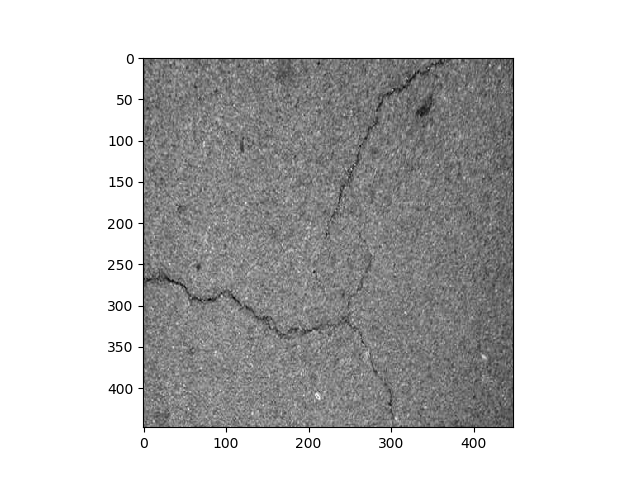

In [10]:
# Img original

d = df_crack.iloc[1].values.reshape(448,448)
plt.imshow(d, cmap='gray')

plt.show()

<IPython.core.display.Javascript object>


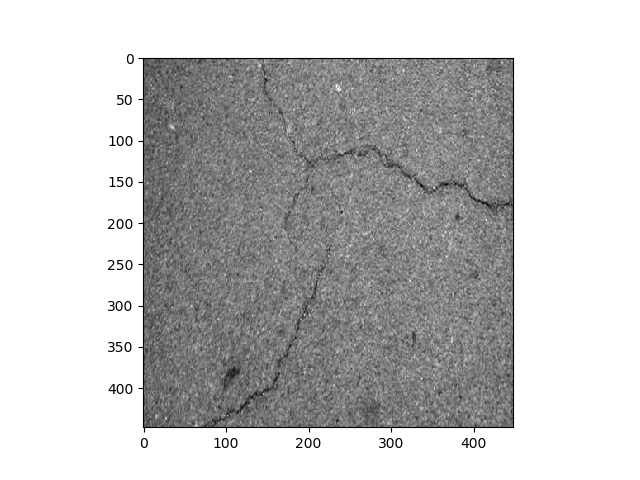

In [11]:
# Img rotacionada em 180°

d = df_crack.iloc[156].values.reshape(448,448)
plt.imshow(d, cmap='gray')

plt.show()

* Imagem sem rachadura

<IPython.core.display.Javascript object>


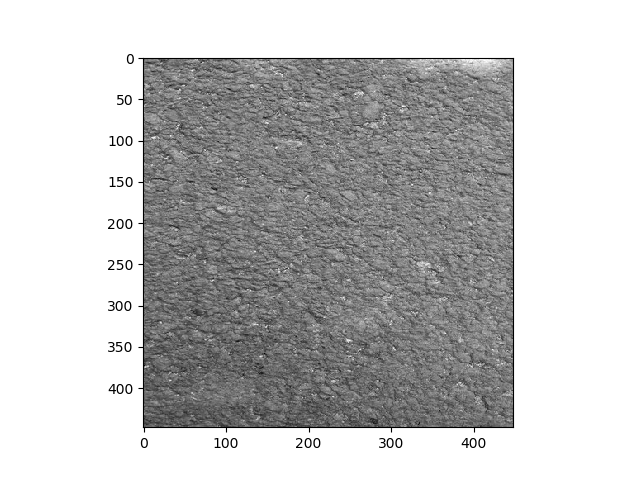

In [15]:
# Img original
d = df_non_crack.iloc[1].values.reshape(448,448)
plt.imshow(d, cmap='gray')

plt.show()

<IPython.core.display.Javascript object>


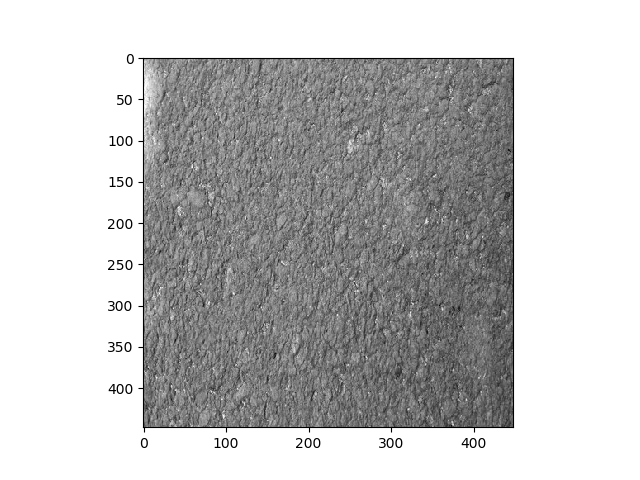

In [16]:
# Img rotacionada em 90°
d = df_non_crack.iloc[201].values.reshape(448,448)
plt.imshow(d, cmap='gray')

plt.show()

<IPython.core.display.Javascript object>


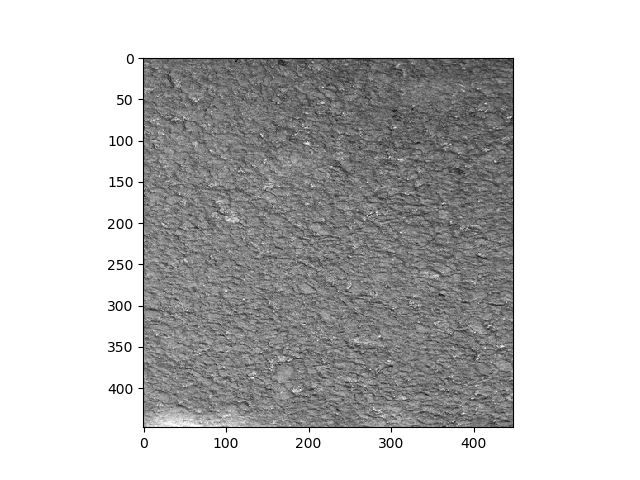

In [17]:
# Img rotacionada em 180°
d = df_non_crack.iloc[401].values.reshape(448,448)
plt.imshow(d, cmap='gray')

plt.show()